# <b>1<span style='color:#0386f7de'>|</span> Importing libraries</b>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from matplotlib import ticker
import warnings
warnings.filterwarnings('ignore')
import time
from scipy.stats import norm

In [2]:
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import OneHotEncoder 
from sklearn import metrics

In [3]:


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

# <b>2<span style='color:#0386f7de'>|</span> Importing the Data </b>




1. HeartDisease : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).
2. BMI : Body Mass Index (BMI).
3. Smoking : Have you smoked at least 100 cigarettes in your entire life? ( The answer Yes or No ).
4. AlcoholDrinking : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
5. Stroke : (Ever told) (you had) a stroke?
6. PhysicalHealth : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days).
7. MentalHealth : Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days).
8. DiffWalking : Do you have serious difficulty walking or climbing stairs?
9. Sex : Are you male or female?
10. AgeCategory: Fourteen-level age category.
11. Race : Imputed race/ethnicity value.
12. Diabetic : (Ever told) (you had) diabetes?
13. PhysicalActivity : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.
14. GenHealth : Would you say that in general your health is...
15. SleepTime : On average, how many hours of sleep do you get in a 24-hour period?
16. Asthma : (Ever told) (you had) asthma?
17. KidneyDisease : Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
18. SkinCancer : (Ever told) (you had) skin cancer?


In [4]:
#Loading CSV file "Dataset"
heart_database = pd.read_csv("Resources/heart_2020_cleaned.csv")
heart_database

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


# <b>3<span style='color:#0386f7de'>|</span> Data Exploration </b>


In [5]:
# Explore Data types
heart_database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

We have roughly 319795 records with 18 columns, according to the result. There are no null values, and there are 14 numeric and four categorical features. We can convert the string properties that only have two unique values, but first let's make sure there aren't any aberrant values.

In [6]:
# Exploring data sample size
print(heart_database.shape)

(319795, 18)


In [7]:
# Find null values
for column in heart_database.columns:
    print(f"Columnn {column} has {heart_database[column].isnull().sum()} null values")

Columnn HeartDisease has 0 null values
Columnn BMI has 0 null values
Columnn Smoking has 0 null values
Columnn AlcoholDrinking has 0 null values
Columnn Stroke has 0 null values
Columnn PhysicalHealth has 0 null values
Columnn MentalHealth has 0 null values
Columnn DiffWalking has 0 null values
Columnn Sex has 0 null values
Columnn AgeCategory has 0 null values
Columnn Race has 0 null values
Columnn Diabetic has 0 null values
Columnn PhysicalActivity has 0 null values
Columnn GenHealth has 0 null values
Columnn SleepTime has 0 null values
Columnn Asthma has 0 null values
Columnn KidneyDisease has 0 null values
Columnn SkinCancer has 0 null values


In [8]:
# Checking unique variables
heart_database.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [9]:
for col in heart_database.columns:
    print(f'Unique Values of {col.title()}: {heart_database[col].unique()}')

Unique Values of Heartdisease: ['No' 'Yes']
Unique Values of Bmi: [16.6  20.34 26.58 ... 62.42 51.46 46.56]
Unique Values of Smoking: ['Yes' 'No']
Unique Values of Alcoholdrinking: ['No' 'Yes']
Unique Values of Stroke: ['No' 'Yes']
Unique Values of Physicalhealth: [ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]
Unique Values of Mentalhealth: [30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]
Unique Values of Diffwalking: ['No' 'Yes']
Unique Values of Sex: ['Female' 'Male']
Unique Values of Agecategory: ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Unique Values of Race: ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Unique Values of Diabetic: ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
Unique Values of Physicalactivi

In [10]:
# Review number of Positive heart disease cases
heart_database['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [11]:
# Review number of Diabetes
heart_database['Diabetic'].value_counts()

No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64

In [12]:
# Tabulating AgeCatory
heart_database["AgeCategory"].value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [13]:
# Tabulating Race
heart_database["Race"].value_counts()

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

In [14]:
# Tabulating GenHealth
heart_database["GenHealth"].value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

# <b>4<span style='color:#0386f7de'>|</span> Preliminary Data Munging </b>

In [15]:
# Changing AgeCategory as category
heart_database["AgeCategory"]=heart_database["AgeCategory"].astype("category")

# Assigning enconeded variable to AgeCategory using cat.codes
heart_database["AgeCategory_cat"] = heart_database["AgeCategory"].cat.codes

#changing variable to category
heart_database["AgeCategory_cat"]=heart_database["AgeCategory_cat"].astype("category")
#heart_database.head(10)

In [16]:
# Changing Diabetes as category
heart_database["Diabetic"]=heart_database["Diabetic"].astype("category")

# Assigning enconeded variable to AgeCategory using cat.codes
heart_database["Diabetic_cat"] = heart_database["Diabetic"].cat.codes

#changing variable to category
heart_database["Diabetic_cat"]=heart_database["Diabetic_cat"].astype("category")

#heart_database.head(10)

In [17]:
# Changing Race as category
heart_database["Race"]=heart_database["Race"].astype("category")

# Assigning enconeded variable to AgeCategory using cat.codes
heart_database["Race_cat"] = heart_database["Race"].cat.codes

#changing variable to category
heart_database["Race_cat"]=heart_database["Race_cat"].astype("category")

#heart_database.head(10)

In [18]:
# Changing GenHealth as category
heart_database["GenHealth"]=heart_database["GenHealth"].astype("category")

# Assigning enconeded variable to GenHealth using cat.codes
heart_database["GenHealth_cat"] = heart_database["GenHealth"].cat.codes

#changing variable to category
heart_database["GenHealth_cat"]=heart_database["GenHealth_cat"].astype("category")

heart_database.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,AgeCategory_cat,Diabetic_cat,Race_cat,GenHealth_cat
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,...,Yes,Very good,5.0,Yes,No,Yes,7,2,5,4
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,...,Yes,Very good,7.0,No,No,No,12,0,5,4
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,...,Yes,Fair,8.0,Yes,No,No,9,2,5,1
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,...,No,Good,6.0,No,No,Yes,11,0,5,2
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,...,Yes,Very good,8.0,No,No,No,4,0,5,4
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,...,No,Fair,12.0,No,No,No,11,0,2,1
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,...,Yes,Fair,4.0,Yes,No,Yes,10,0,5,1
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,...,No,Good,9.0,Yes,No,No,12,2,5,2
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,...,No,Fair,5.0,No,Yes,No,12,1,5,1
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,...,Yes,Good,10.0,No,No,No,9,0,5,2


We'll utilize OneHotEncoder in the preprocessing stage later for some variables that have more than two unique values.

# <b>5<span style='color:#0386f7de'>|</span>Descriptives of Numeric Variables</b>

In [19]:
numeric = heart_database.select_dtypes(include='float64')
numeric.describe().T.style.set_properties(**{'background-color': 'grey','color': 'white','border-color': 'white'})

,count,mean,std,min,25%,50%,75%,max
BMI,319795.000000,28.325399,6.356100,12.020000,24.030000,27.340000,31.420000,94.850000
PhysicalHealth,319795.000000,3.371710,7.950850,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,319795.000000,3.898366,7.955235,0.000000,0.000000,0.000000,3.000000,30.000000
SleepTime,319795.000000,7.097075,1.436007,1.000000,6.000000,7.000000,8.000000,24.000000


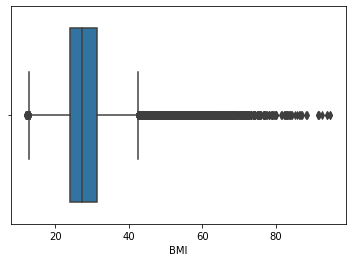

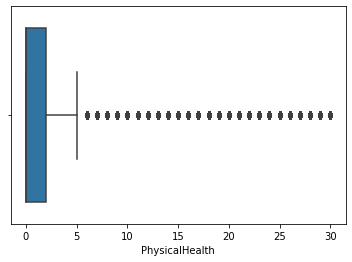

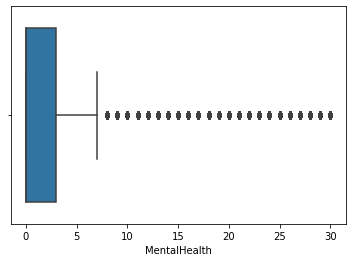

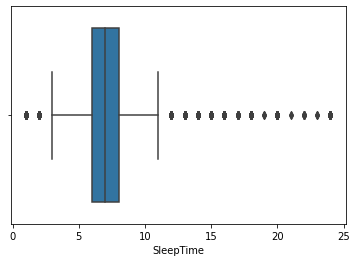

In [20]:
# Exploring looking for outliers
for i in numeric.columns:
    sns.boxplot(x=numeric[i])
    plt.show()
plt.show()

In [21]:
gen_health = heart_database['GenHealth'].value_counts()
sleep_time = heart_database['SleepTime'].value_counts().iloc[:5]

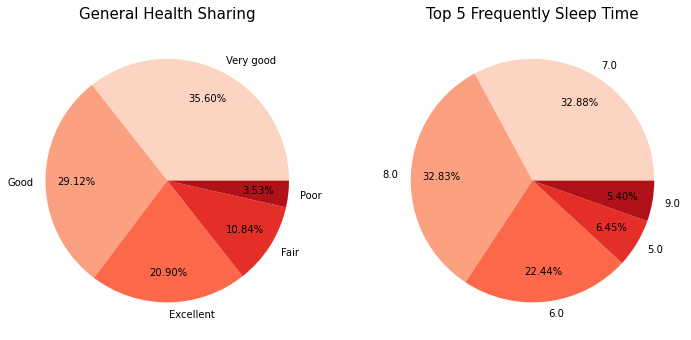

In [22]:
# Descriptives of General Health Sharing and Frequency of Sleep Time
fig, axes = plt.subplots(1, 2, figsize=(12, 9))
color = sns.color_palette('Reds', 5)
x_axes = [gen_health, sleep_time]

for i, ax in enumerate(axes):
    ax.pie(x=x_axes[i].values, labels=x_axes[i].index, autopct='%.2f%%', colors=color, pctdistance=.75)
axes[0].set_title('General Health Sharing', fontsize=15, pad=10)
axes[1].set_title('Top 5 Frequently Sleep Time', fontsize=15, pad=10)

plt.show()

In [23]:
# BMI bell curve

## 5-1<span style='color:#0386f7de'>|</span>Descriptives of BMI, Physical Health, Mental Health, Sleeptime, and Heart Disease by Sex</b>

In [24]:
# Descriptive statistics BMIby sex
heart_database["BMI"].groupby(heart_database['Sex']).describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
Female,167805.0,28.162436,6.841990,12.02,23.30,26.75,31.62,94.66
Male,151990.0,28.505317,5.767018,12.02,24.63,27.50,31.32,94.85


In [25]:
# Descriptive statistics Physical Health by sex
heart_database["PhysicalHealth"].groupby(heart_database['Sex']).describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
Female,167805.0,3.681225,8.184823,0.0,0.0,0.0,2.0,30.0
Male,151990.0,3.029989,7.669794,0.0,0.0,0.0,1.0,30.0


In [26]:
# Descriptive statistics of Mental Health by sex
df = heart_database["MentalHealth"].groupby(heart_database['Sex']).describe()



In [27]:
# Descriptive statistics SleepTime by sex
heart_database["SleepTime"].groupby(heart_database['Sex']).describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
Female,167805.0,7.118536,1.452643,1.0,6.0,7.0,8.0,24.0
Male,151990.0,7.073380,1.417041,1.0,6.0,7.0,8.0,24.0


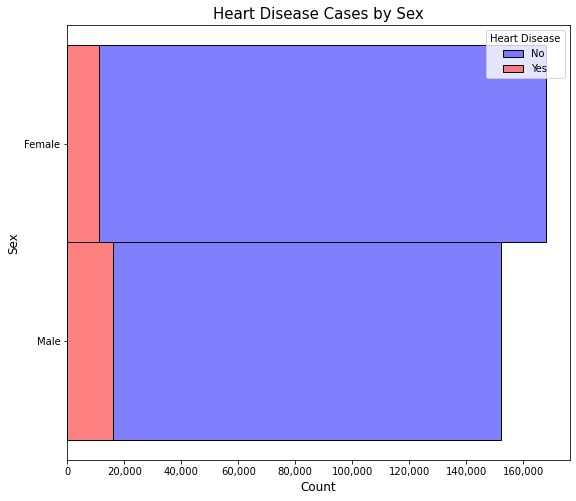

In [28]:
fig, ax = plt.subplots(figsize=(9, 8))
sns.histplot(data=heart_database, y='Sex', hue='HeartDisease', multiple='stack', palette='seismic')

ax.set_title('Heart Disease Cases by Sex', fontsize=15)
ax.set_ylabel('Sex', fontdict={'fontsize': 12})
ax.set_xlabel('Count', fontdict={'fontsize': 12})
ax.xaxis.set_major_formatter(lambda x, pos: format(int(x), ','))
ax.get_legend().set_title('Heart Disease')

plt.show()

# 5-2<span style='color:#0386f7de'>|</span>Descriptives of BMI, Physical Health, Mental Health, Sleeptime, and Heart Disease by Age Category</b>

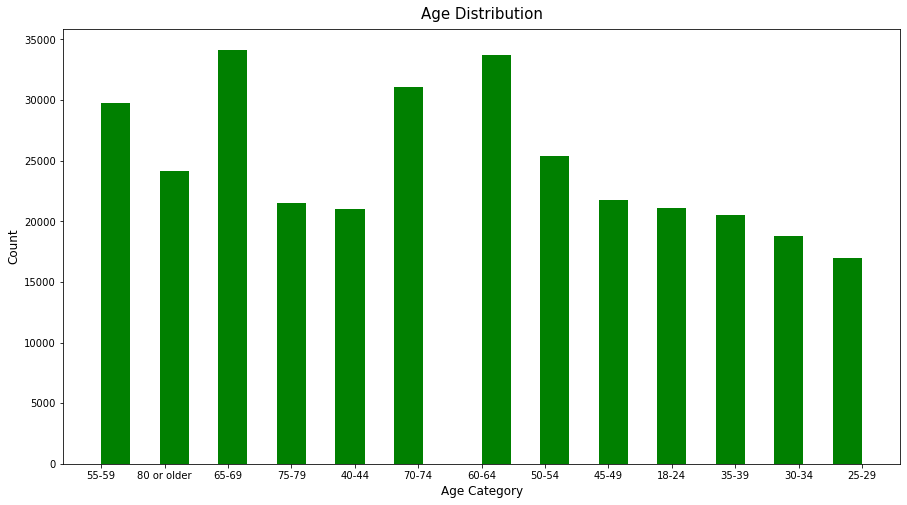

In [29]:
# Age Category Distribution

fig, ax = plt.subplots(figsize=(15, 8))

ax.hist(heart_database["AgeCategory"],bins=26, color="green")

ax.set_title('Age Distribution', fontsize=15, pad=10)
ax.set_ylabel('Count', fontsize=12)
ax.set_xlabel('Age Category', fontsize=12)

plt.show()

In [30]:
# Descriptive statistics of BMI
heart_database["BMI"].groupby(heart_database['AgeCategory']).describe()

,count,mean,std,min,25%,50%,75%,max
AgeCategory,,,,,,,,
18-24,21064.0,25.762770,6.022755,12.02,21.70,24.39,28.3700,83.33
25-29,16955.0,27.688610,6.647318,12.85,23.03,26.39,30.9000,85.91
30-34,18753.0,28.440007,6.847860,12.08,23.73,27.12,31.5700,87.05
35-39,20550.0,28.838634,6.864525,12.16,24.21,27.44,32.1100,94.85
40-44,21006.0,29.199764,6.891979,12.40,24.41,27.98,32.4900,91.55
45-49,21791.0,29.487189,6.835868,12.88,24.85,28.25,32.8900,82.50
50-54,25382.0,29.425097,6.681381,12.26,24.96,28.32,32.7675,94.66
55-59,29757.0,29.098977,6.473161,12.02,24.80,28.13,32.2800,91.55
60-64,33686.0,28.821778,6.262162,12.13,24.41,27.89,32.0100,84.44


In [31]:
# Descriptive statistics Physical Health by sex
heart_database["PhysicalHealth"].groupby(heart_database['AgeCategory']).describe()

,count,mean,std,min,25%,50%,75%,max
AgeCategory,,,,,,,,
18-24,21064.0,1.698965,4.793995,0.0,0.0,0.0,1.0,30.0
25-29,16955.0,1.802241,5.211307,0.0,0.0,0.0,1.0,30.0
30-34,18753.0,2.018344,5.680184,0.0,0.0,0.0,1.0,30.0
35-39,20550.0,2.241606,6.098385,0.0,0.0,0.0,1.0,30.0
40-44,21006.0,2.574836,6.761034,0.0,0.0,0.0,1.0,30.0
45-49,21791.0,3.020834,7.450552,0.0,0.0,0.0,1.0,30.0
50-54,25382.0,3.607596,8.228561,0.0,0.0,0.0,2.0,30.0
55-59,29757.0,4.027422,8.707722,0.0,0.0,0.0,2.0,30.0
60-64,33686.0,4.317728,9.099901,0.0,0.0,0.0,2.0,30.0


In [32]:
# Descriptive statistics of Mental Health by AgeCategory
heart_database["MentalHealth"].groupby(heart_database['AgeCategory']).describe()

,count,mean,std,min,25%,50%,75%,max
AgeCategory,,,,,,,,
18-24,21064.0,6.152535,8.700449,0.0,0.0,2.0,10.0,30.0
25-29,16955.0,5.729106,8.693158,0.0,0.0,1.0,7.0,30.0
30-34,18753.0,5.292540,8.590964,0.0,0.0,0.0,7.0,30.0
35-39,20550.0,5.049781,8.651773,0.0,0.0,0.0,5.0,30.0
40-44,21006.0,4.675188,8.542309,0.0,0.0,0.0,5.0,30.0
45-49,21791.0,4.385710,8.307699,0.0,0.0,0.0,5.0,30.0
50-54,25382.0,4.321763,8.481494,0.0,0.0,0.0,4.0,30.0
55-59,29757.0,4.055953,8.287960,0.0,0.0,0.0,3.0,30.0
60-64,33686.0,3.550555,7.871680,0.0,0.0,0.0,2.0,30.0


In [33]:
# Descriptive statistics SleepTime by AgeCategory
heart_database["SleepTime"].groupby(heart_database['AgeCategory']).describe()

,count,mean,std,min,25%,50%,75%,max
AgeCategory,,,,,,,,
18-24,21064.0,7.186432,1.428225,1.0,6.0,7.0,8.0,24.0
25-29,16955.0,6.986435,1.359409,1.0,6.0,7.0,8.0,24.0
30-34,18753.0,6.872660,1.335672,1.0,6.0,7.0,8.0,24.0
35-39,20550.0,6.854939,1.363130,1.0,6.0,7.0,8.0,24.0
40-44,21006.0,6.876940,1.356250,1.0,6.0,7.0,8.0,20.0
45-49,21791.0,6.904043,1.378228,1.0,6.0,7.0,8.0,24.0
50-54,25382.0,6.924159,1.423170,1.0,6.0,7.0,8.0,24.0
55-59,29757.0,6.965487,1.439668,1.0,6.0,7.0,8.0,24.0
60-64,33686.0,7.059105,1.448716,1.0,6.0,7.0,8.0,24.0


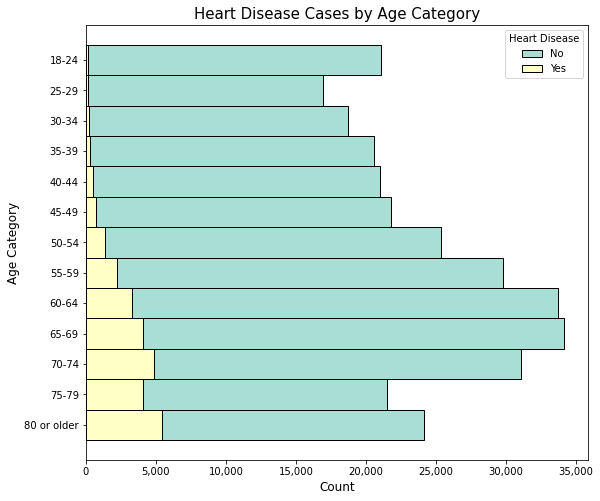

In [34]:
fig, ax = plt.subplots(figsize=(9, 8))
sns.histplot(data=heart_database, y='AgeCategory', hue='HeartDisease', multiple='stack', palette='Set3')

ax.set_title('Heart Disease Cases by Age Category', fontsize=15)
ax.set_ylabel('Age Category', fontdict={'fontsize': 12})
ax.set_xlabel('Count', fontdict={'fontsize': 12})
ax.xaxis.set_major_formatter(lambda x, pos: format(int(x), ','))
ax.get_legend().set_title('Heart Disease')

plt.show()

## <b> 6<span style='color:#0386f7de'>|</span>Analysis of Non-Numeric Variables</b>

In [35]:
non_numeric_a = heart_database.select_dtypes(exclude='float64')
non_numeric = non_numeric_a.select_dtypes(exclude='category')

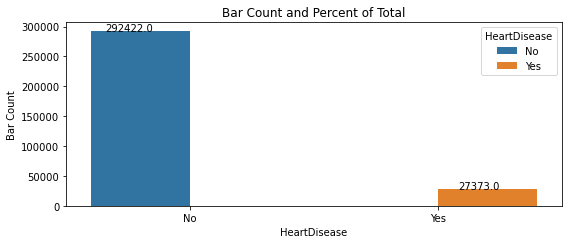

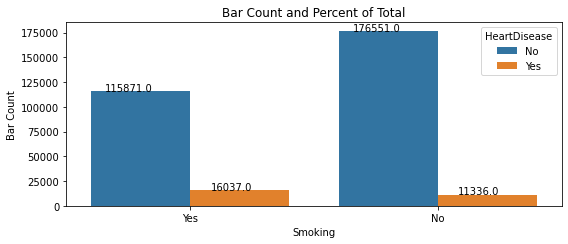

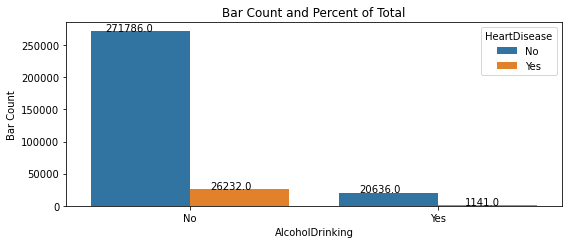

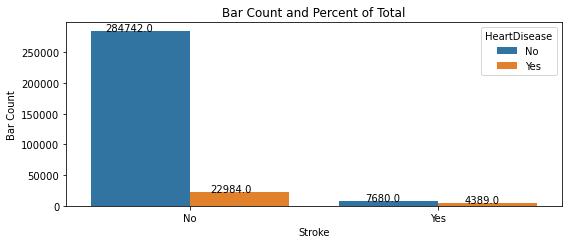

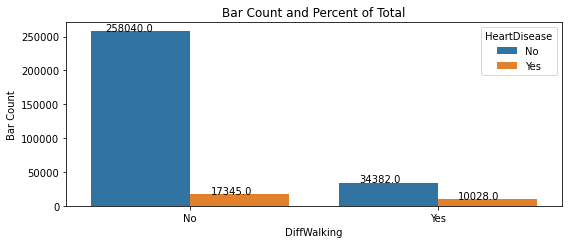

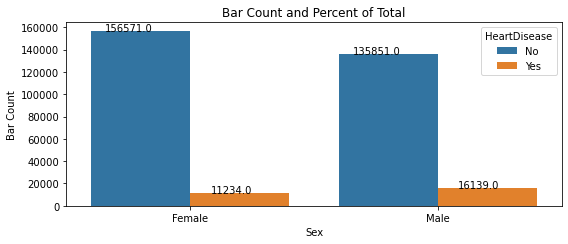

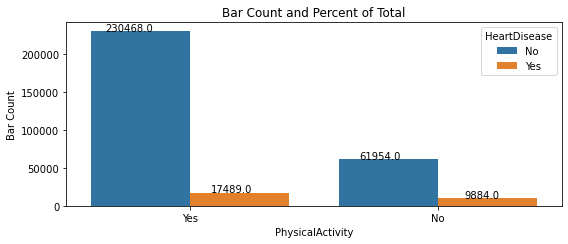

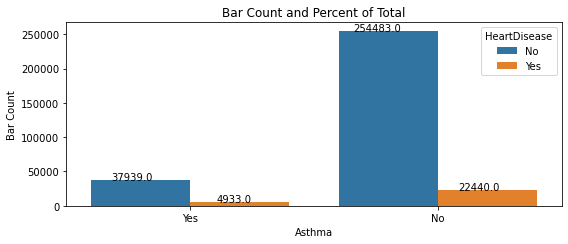

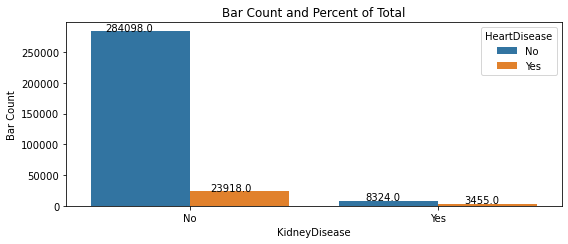

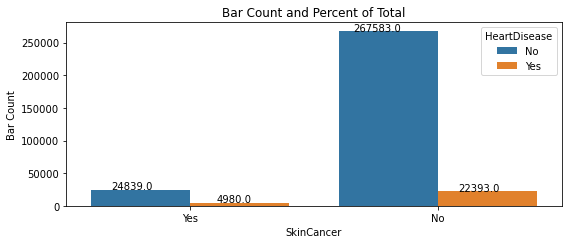

In [36]:
# Creating the Chart
for i in non_numeric.columns:
    plt.rcParams["figure.figsize"] = [8.00, 3.50]
    plt.rcParams["figure.autolayout"] = True
    ax = sns.countplot(x = non_numeric[i],data = non_numeric,hue ='HeartDisease')
    ax.set(ylabel='Bar Count', title='Bar Count and Percent of Total')

    # Seeting up % on the graphs
    for p in ax.patches:
        percentage = '{:.1f}' .format(p.get_height())
        x = p.get_x() -0.15 + p.get_width()
        y = p.get_height()
        ax.annotate(percentage , (x, y),ha='right')
    plt.show()

# <b>7<span style='color:#0386f7de'>|</span>Heat Map Correlation Factors Between variables </b>

In [37]:
df = heart_database

In [38]:
df['HeartDisease'].replace({'No':0,'Yes':1}, inplace=True)

df['Smoking'].replace({'No':0,'Yes':1}, inplace=True)

df['AlcoholDrinking'].replace({'No':0,'Yes':1}, inplace=True)

df['Stroke'].replace({'No':0,'Yes':1}, inplace=True)

df['DiffWalking'].replace({'No':0,'Yes':1}, inplace=True)

df['Diabetic'].replace({'No':0,'No, borderline diabetes':0,'Yes (during pregnancy)':1,'Yes':1}, inplace=True)

df['PhysicalActivity'].replace({'No':0,'Yes':1}, inplace=True)

df['Asthma'].replace({'No':0,'Yes':1}, inplace=True)

df['KidneyDisease'].replace({'No':0,'Yes':1}, inplace=True)

df['SkinCancer'].replace({'No':0,'Yes':1}, inplace=True)

df['Sex'].replace({'Male':0,'Female':1}, inplace=True)

df['AgeCategory'].replace({'18-24':0,'25-29':1,'30-34':2,'35-39':3,'40-44':4,'45-49':5,'50-54':6,'55-59':7,'60-64':8,'65-69':9,'70-74':10,'75-79':11,'80 or older':12}, inplace=True)

df['Race'].replace({'White':0,'Hispanic':1,'Black':2,'Asian':3,'American Indian/Alaskan Native':4,'Other':5}, inplace=True)

df['GenHealth'].replace({'Excellent':0,'Very good':1,'Good':2,'Fair':3,'Poor':4}, inplace=True)

In [39]:
train, test = train_test_split(df,stratify=df['HeartDisease'],test_size=.2,random_state=0)

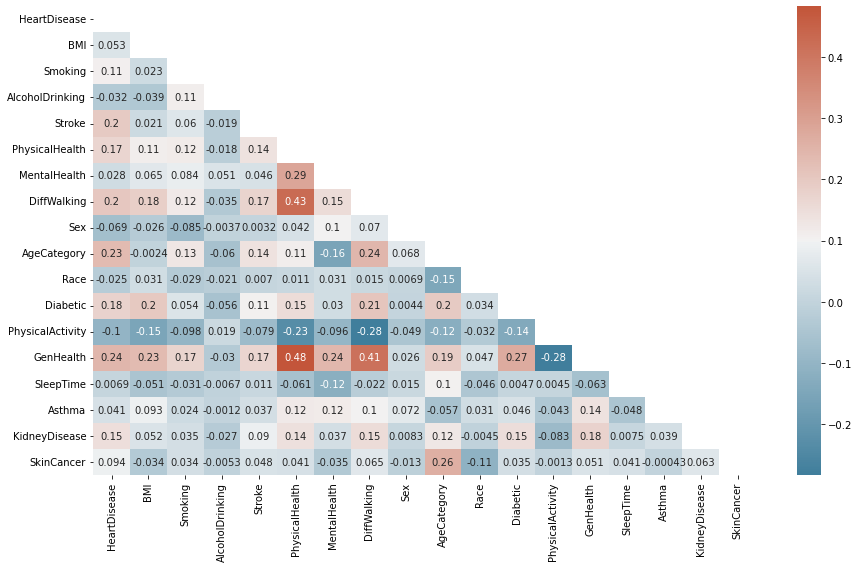

In [40]:
plt.figure(figsize=(13,8))
mask = np.triu(np.ones_like(train.corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(train.corr(), mask=mask, cmap=cmap, annot=True)
plt.show()

# <b>8<span style='color:#0386f7de'>|</span> ML Data Preprocessing</b>


In [42]:
# Standarize and encode the data in order to be ready for building up the Training and testing data sets.

# <b>9<span style='color:#0386f7de'>|</span> Split Dataset for Training and Testing</b>

In [43]:
# Split the dataset in training and testing to perform then Maching learning process.

# <b>10<span style='color:#0386f7de'>|</span> Modeling</b>

In [44]:
# We are going to perform a Classifier Analysis and a Tree decission Model to evaluate the best model to predict the heart dissiesa variable.

# <b>11<span style='color:#0386f7de'>|</span> Modeling Comparison and Conclusions</b>

In [45]:
# We are going to compare the model built in 9 to reach the conclusions. 